# Тема проекта "Интернет-магазин компьютерных игр"


# **Описание проекта**

- *Заказчик исследования* - интернет-магазине «Ачивка».<br>
- Необходимо изучить из открытых источников доступные исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br>


# Цели и задачи проекта

**Цели проекта:**<br>
Получить практические навыки самостоятельной работы c датафреймами, а также связанными с ними библиотеками.<br><br>
**Задачи проекта:**<br>
- Изучить предоставленные данные <br>
- Выполнить предобработку<br>
- Сделать первоначальную оценку
- Обучиться использованию библиотек, с помощью которых будет выполнена работа
- Использовать полученные знания, сделав глубокий анализ данных
- Создать модель машинного обучения
- Общий вывод по проекту

# **Содержание проекта**

**1. Загрузка файла с данными и изучение общей информации**<br>
<a id='загрузка_файла'></a>
[Шаг 1. Загрузка файла](#загрузка_файла_задание)<br>

**2. Предобработка данных**<br>
<a id='предобработка_данных'></a>
[Шаг 2. Предобработка данных](#предобработка_данных_задание)<br>

<a id='2.1'></a>
[2.1. Переименование столбца, изменение логики порядка столбцов в датафрейме](#2.1_задание)<br>
<a id='2.2'></a>
[2.2. Проверка на редкие и выбивающиеся значения](#2.2_задание)<br>
<a id='2.3'></a>
[2.3. Проверка типов данных](#2.3_задание)<br>
<a id='2.4'></a>
[2.4. Изучение пропусков в датафрейме](#2.4_задание)<br>
<a id='2.5'></a>
[2.5. Изучение дубликатов в датафрейме](#2.5_задание)<br>
<a id='2.6'></a>
[2.6. Изучение категориальных значений](#2.6_задание)<br>
<a id='2.7'></a>
[2.7. Проверка количественных значений](#2.7_задание)<br>
<a id='2.8'></a>
[2.8. Добавление новых столбцов](#2.8_задание)<br>

**3. Исследовательский анализ данных**<br>
<a id='исследовательский_анализ'></a>
[Шаг 3. Исследовательский анализ](#исследовательский_анализ_задание)<br>

**4. Графический анализ данных**<br>
<a id='графический_анализ'></a>
[Шаг 4. Графический анализ данных](#_задание)<br>

**5. Построение и обучение простейшей модели для задачи регрессии**<br>
<a id='графический_анализ'></a>
[Шаг 5. Построение модели, оценка модели, предсказание для одной игры](#_задание)<br>

**6. Общий вывод по проекту**<br>
<a id='общий_вывод'></a>
[Шаг 6. Общий вывод](#общий_вывод_задание)

***

Шпаргалка по анализу данных в Pandas:<br>
https://blog.skillfactory.ru/kak-nachat-analizirovat-dannye-v-pandas-pervye-shagi/ <br>
https://habr.com/ru/companies/ruvds/articles/494720/

***

# 1. Загрузка файла с данными и изучение общей информации
<a id='загрузка_файла_задание'></a>
[К содержанию](#загрузка_файла)

1.1. Импорт библиотек /
Сброс ограничений на количество выводимых столбцов.

In [202]:
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import numpy as np
import sklearn
import tqdm
import time

import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from tqdm import tqdm
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import(
    mean_squared_error,
    r2_score
)
from datetime import datetime

In [203]:
pd.set_option('display.max_columns', None)

Установка единообразного отображения вещественных чисел с двумя знаками после запятой.

In [204]:
pd.set_option('display.float_format', '{:,.2f}'.format)

**1.2.** Загрузка файла с данными.

In [205]:
data = pd.read_csv('17_games.csv')

**1.3.** Изучение общей информации о датафрейме, структуры данных.

In [206]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Pokemon Ruby/Pokemon Sapphire,GBA,"2,002.00",Role-Playing,6.06,3.90,5.38,0.50,NaN,NaN,NaN
1,Brain Age 2: More Training in Minutes a Day,DS,"2,005.00",Puzzle,3.43,5.35,5.32,1.18,77.00,7.1,E
2,Pokemon Black/Pokemon White,DS,"2,010.00",Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN
3,Gran Turismo 3: A-Spec,PS2,"2,001.00",Racing,6.85,5.09,1.87,1.16,95.00,8.4,E
4,Call of Duty: Modern Warfare 3,X360,"2,011.00",Shooter,9.04,4.24,0.13,1.32,88.00,3.4,M
...,...,...,...,...,...,...,...,...,...,...,...
16676,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16677,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16678,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16679,Spirits & Spells,GBA,"2,003.00",Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**1.4.** Знакомство с данными, вывод первых десяти строк датафрейма.

In [207]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Pokemon Ruby/Pokemon Sapphire,GBA,"2,002.00",Role-Playing,6.06,3.90,5.38,0.50,NaN,NaN,NaN
1,Brain Age 2: More Training in Minutes a Day,DS,"2,005.00",Puzzle,3.43,5.35,5.32,1.18,77.00,7.1,E
2,Pokemon Black/Pokemon White,DS,"2,010.00",Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN
3,Gran Turismo 3: A-Spec,PS2,"2,001.00",Racing,6.85,5.09,1.87,1.16,95.00,8.4,E
4,Call of Duty: Modern Warfare 3,X360,"2,011.00",Shooter,9.04,4.24,0.13,1.32,88.00,3.4,M
5,Pokémon Yellow: Special Pikachu Edition,GB,"1,998.00",Role-Playing,5.89,5.04,3.12,0.59,NaN,NaN,NaN
6,Call of Duty: Black Ops 3,PS4,"2,015.00",Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN
7,Call of Duty: Black Ops,X360,"2,010.00",Shooter,9.70,3.68,0.11,1.13,87.00,6.3,M
8,Pokemon X/Pokemon Y,3DS,"2,013.00",Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN
9,Call of Duty: Black Ops II,PS3,"2,012.00",Shooter,4.99,5.73,0.65,2.42,83.00,5.3,M


**1.5.** Знакомство с данными, вывод последних десяти строк датафрейма.

In [208]:
data.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16671,15 Days,PC,"2,009.00",Adventure,0.00,0.01,0.00,0.00,63.00,5.8,NaN
16672,Men in Black II: Alien Escape,GC,"2,003.00",Shooter,0.01,0.00,0.00,0.00,NaN,tbd,T
16673,Aiyoku no Eustia,PSV,"2,014.00",Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16674,Woody Woodpecker in Crazy Castle 5,GBA,"2,002.00",Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16675,SCORE International Baja 1000: The Official Game,PS2,"2,008.00",Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16676,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16677,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16678,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16679,Spirits & Spells,GBA,"2,003.00",Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16680,Winning Post 8 2016,PSV,"2,016.00",Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN


**1.6.** Знакомство с данными, вывод случайной выборки из датафрейма.

In [209]:
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
7160,Luminous Arc 2,DS,"2,008.00",Role-Playing,0.20,0.00,0.00,0.02,73.00,7.7,T
12376,Unchained Blades,PSP,"2,011.00",Role-Playing,0.00,0.00,0.06,0.00,61.00,7.5,T
15951,Romance of the Three Kingdoms XII,WiiU,"2,012.00",Strategy,0.00,0.00,0.02,0.00,NaN,NaN,NaN
4602,Castlevania: Curse of Darkness,PS2,"2,005.00",Action,0.18,0.14,0.05,0.05,70.00,7.5,M
10141,Project: Snowblind,XB,"2,005.00",Action,0.08,0.02,0.00,0.00,79.00,7,T
762,Tetris DS,DS,"2,006.00",Puzzle,0.63,0.05,1.35,0.08,84.00,8.7,E
13704,Farm Frenzy 3,PC,"2,009.00",Strategy,0.00,0.03,0.00,0.01,NaN,tbd,E
13984,Bionicle Heroes,Wii,"2,007.00",Shooter,0.03,0.00,0.00,0.00,52.00,5.8,E10+
12068,Famicom Mini: Wrecking Crew,GBA,"2,004.00",Puzzle,0.00,0.00,0.07,0.00,NaN,NaN,NaN
1336,Dragon Quest Monsters: Joker 2,DS,"2,010.00",Role-Playing,0.09,0.07,1.24,0.02,77.00,7.3,E


**1.7.** Знакомство с атрибутами датафрейма.

In [210]:
data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [211]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [212]:
data.shape

(16681, 11)

In [213]:
data.info

<bound method DataFrame.info of                                               Name Platform  Year_of_Release  \
0                    Pokemon Ruby/Pokemon Sapphire      GBA         2,002.00   
1      Brain Age 2: More Training in Minutes a Day       DS         2,005.00   
2                      Pokemon Black/Pokemon White       DS         2,010.00   
3                           Gran Turismo 3: A-Spec      PS2         2,001.00   
4                   Call of Duty: Modern Warfare 3     X360         2,011.00   
...                                            ...      ...              ...   
16676                Samurai Warriors: Sanada Maru      PS3         2,016.00   
16677                             LMA Manager 2007     X360         2,006.00   
16678                      Haitaka no Psychedelica      PSV         2,016.00   
16679                             Spirits & Spells      GBA         2,003.00   
16680                          Winning Post 8 2016      PSV         2,016.00   

       

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16681 entries, 0 to 16680
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16679 non-null  object 
 1   Platform         16681 non-null  object 
 2   Year_of_Release  16413 non-null  float64
 3   Genre            16679 non-null  object 
 4   NA_sales         16681 non-null  float64
 5   EU_sales         16681 non-null  float64
 6   JP_sales         16681 non-null  float64
 7   Other_sales      16681 non-null  float64
 8   Critic_Score     8116 non-null   float64
 9   User_Score       9992 non-null   object 
 10  Rating           9927 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


> **Предварительный вывод по данным**

Согласно документации к данным,

Датасет **17_games** содержит информацию из открытых источников - данные о продажах игр, оценки пользователей и экспертов, жанры и платформы

Описание данных:
-  Name  – название игры
- Platform  – платформа
- Year_of_Release – год выпуска
- Genre – жанр игры
- NA_sales – продажи в Северной Америке (миллионы долларов)
- EU_sales – продажи в Европе (миллионы долларов)
- JP_sales – продажи в Японии (миллионы долларов)
- Other_sales – продажи в других странах (миллионы долларов)
- Critic_Score – оценка критиков (максимум 100)
- User_Score – оценка пользователей (максимум 10)
- Rating – рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им
подходящую возрастную категорию.

In [215]:
data.head(25)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Pokemon Ruby/Pokemon Sapphire,GBA,"2,002.00",Role-Playing,6.06,3.90,5.38,0.50,NaN,NaN,NaN
1,Brain Age 2: More Training in Minutes a Day,DS,"2,005.00",Puzzle,3.43,5.35,5.32,1.18,77.00,7.1,E
2,Pokemon Black/Pokemon White,DS,"2,010.00",Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN
3,Gran Turismo 3: A-Spec,PS2,"2,001.00",Racing,6.85,5.09,1.87,1.16,95.00,8.4,E
4,Call of Duty: Modern Warfare 3,X360,"2,011.00",Shooter,9.04,4.24,0.13,1.32,88.00,3.4,M
5,Pokémon Yellow: Special Pikachu Edition,GB,"1,998.00",Role-Playing,5.89,5.04,3.12,0.59,NaN,NaN,NaN
6,Call of Duty: Black Ops 3,PS4,"2,015.00",Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN
7,Call of Duty: Black Ops,X360,"2,010.00",Shooter,9.70,3.68,0.11,1.13,87.00,6.3,M
8,Pokemon X/Pokemon Y,3DS,"2,013.00",Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN
9,Call of Duty: Black Ops II,PS3,"2,012.00",Shooter,4.99,5.73,0.65,2.42,83.00,5.3,M


1.  В датафрейме 16681 записей, 11 столбцов.
3. Нарушение стиля в заголовке столбцов: **Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_score,Rating**, следует изменить регистр.
4. Из столбца **Year_of_Release** для более детального анализа данных следует выделить год без лишних знаков , для столбца **Critic_Score** следует также убрать лишние знаки
6. В столбцах **Name** , **Platform**, **Year_of_Release**, **Genre**, **Rating**  возможны дубликаты.
5. В **Name**, **Year_of_Release**, **Genre**, **Critic_Scrore**, **User_Score**, **Rating** столбцах имеются пропущенные значения.

# 2. Предобработка данных
<a id='предобработка_данных_задание'></a>
[К содержанию](#предобработка_данных)

#### Шаг 2.1. Переименование столбцов, изменение логики порядка столбцов в датафрейме
<a id='2.1_задание'></a>
[К содержанию](#2.1)

Убедитесь, что в заголовках столбцов нет лишних пробелов, нарушения "змеиного регистра".

In [216]:
data.columns = data.columns.str.strip()
print(data.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


Выполните предобработку данных в датафрейме - приведение строчных значений к одному (нижнему) регистру.

In [217]:
data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,pokemon ruby/pokemon sapphire,gba,"2,002.00",role-playing,6.06,3.90,5.38,0.50,NaN,NaN,NaN
1,brain age 2: more training in minutes a day,ds,"2,005.00",puzzle,3.43,5.35,5.32,1.18,77.00,7.1,e
2,pokemon black/pokemon white,ds,"2,010.00",role-playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN
3,gran turismo 3: a-spec,ps2,"2,001.00",racing,6.85,5.09,1.87,1.16,95.00,8.4,e
4,call of duty: modern warfare 3,x360,"2,011.00",shooter,9.04,4.24,0.13,1.32,88.00,3.4,m
5,pokémon yellow: special pikachu edition,gb,"1,998.00",role-playing,5.89,5.04,3.12,0.59,NaN,NaN,NaN
6,call of duty: black ops 3,ps4,"2,015.00",shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN
7,call of duty: black ops,x360,"2,010.00",shooter,9.70,3.68,0.11,1.13,87.00,6.3,m
8,pokemon x/pokemon y,3ds,"2,013.00",role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN
9,call of duty: black ops ii,ps3,"2,012.00",shooter,4.99,5.73,0.65,2.42,83.00,5.3,m


***

#### Шаг 2.2. Проверка на редкие и выбивающиеся значения
<a id='2.2_задание'></a>
[К содержанию](#2.2)

Используя методы unique(), value_counts(), функцию sort_values() попробуйте выявить в датасете редкие и выбивающиеся значения. Предположите, почему эти значение могли появиться.

Проверка столбцов , в которых могут быть выбивающиеся значения

In [218]:
data['Platform'].sort_values().unique()

array(['2600', '3do', '3ds', 'dc', 'ds', 'gb', 'gba', 'gc', 'gen', 'gg',
       'n64', 'nes', 'ng', 'pc', 'pcfx', 'ps', 'ps2', 'ps3', 'ps4', 'psp',
       'psv', 'sat', 'scd', 'snes', 'tg16', 'wii', 'wiiu', 'ws', 'x360',
       'xb', 'xone'], dtype=object)

In [219]:
data['Year_of_Release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [220]:
data['Genre'].sort_values().unique()

array(['action', 'adventure', 'fighting', 'misc', 'platform', 'puzzle',
       'racing', 'role-playing', 'shooter', 'simulation', 'sports',
       'strategy', nan], dtype=object)

In [221]:
data['Critic_Score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

In [222]:
data['User_Score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [223]:
data['Rating'].sort_values().unique()

array(['ao', 'e', 'e10+', 'ec', 'k-a', 'm', 'rp', 't', nan], dtype=object)

> **Предварительный вывод по шагу 2.2**

- Со столбцами **Year_of_Release,Genre,Critic_Score,Rating,Platform** нет проблем с несуществующими или неправильными значениями
- У столбца **User_Score** есть необычное значение 'tbd'
- Во многих столбцах есть пропущенные значения

***

#### Шаг 2.3. Проверка типов данных
<a id='2.3_задание'></a>
[К содержанию](#2.3)

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16681 entries, 0 to 16680
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16679 non-null  object 
 1   Platform         16681 non-null  object 
 2   Year_of_Release  16413 non-null  float64
 3   Genre            16679 non-null  object 
 4   NA_sales         16681 non-null  float64
 5   EU_sales         16681 non-null  float64
 6   JP_sales         16681 non-null  float64
 7   Other_sales      16681 non-null  float64
 8   Critic_Score     8116 non-null   float64
 9   User_Score       9992 non-null   object 
 10  Rating           9927 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [225]:
data.columns = data.columns.str.lower()

In [226]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,pokemon ruby/pokemon sapphire,gba,"2,002.00",role-playing,6.06,3.90,5.38,0.50,NaN,NaN,NaN


> **Предварительный вывод по шагу 2.3**

В шаге 2.3 проекта были выполнены следующие действия:
- Изучены типы данных. Требуется замена типа данных у столбцов Year_of_Release,Critic_Score,User_Score на int,int,float соответственно
- Сделал маленький регистр у названий столбцов

***

#### Шаг 2.4. Изучение пропусков в датафрейме
<a id='2.4_задание'></a>
[К содержанию](#2.4)

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

**a)** Анализ количества **пропусков** в столбцах.

In [227]:
missing_values = data.isnull().sum()
missing_values

name                  2
platform              0
year_of_release     268
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8565
user_score         6689
rating             6754
dtype: int64

**b)** Расчет **количества пропущенных значений** в каждом столбце, **в процентах**.

In [228]:
missing_percentage = data.isnull().sum() / len(data) * 100
missing_percentage

name               0.01
platform           0.00
year_of_release    1.61
genre              0.01
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score      51.35
user_score        40.10
rating            40.49
dtype: float64

> **Предварительный вывод**

- Пропущено два значения **name** , но это не представляет никакой проблемы для дальнейшей модели машинного обучения. Необходимости искать названия нету.
- Пропущено 268 значений **year_of_release** , это может помешать дальнейшим расчётам , но не критично.
- Пропущено два значения **genre**. Не представляет никакой проблемы , однако при возможности можно попробовать найти жанр игры.
- **critic_score , user_score , rating** - В этих столбцах пропущено критическое количество значений. Выборка уменьшится почти вдвое . Искать такое количество значений вручную возможности не представляется.


***

Проработайте каждый столбец по отдельности.

**c)** Столбец name.

In [229]:
row_number = data[data['name'].isnull()].index[0]
row_634 = data.iloc[row_number]
print(row_634)

name                   NaN
platform               gen
year_of_release   1,993.00
genre                  NaN
na_sales              1.78
eu_sales              0.53
jp_sales              0.00
other_sales           0.08
critic_score           NaN
user_score             NaN
rating                 NaN
Name: 634, dtype: object


In [230]:
row_number = data[data['name'].isnull()].index[1]
row_634 = data.iloc[row_number]
print(row_634)

name                   NaN
platform               gen
year_of_release   1,993.00
genre                  NaN
na_sales              0.00
eu_sales              0.00
jp_sales              0.03
other_sales           0.00
critic_score           NaN
user_score             NaN
rating                 NaN
Name: 14210, dtype: object


Нашли две строки , заменим пустые значения на 'no data'

In [231]:
data['name'] = data['name'].fillna('no data')

**d)** Столбец year_of_release.

Меняем пустые значения на -1 и меняем тип на int64

In [232]:
data['year_of_release'] = data['year_of_release'].fillna(-1)
data['year_of_release'] = data['year_of_release'].astype(int)

**e)** Столбец genre.

Мы выяснили , что у двух фильмов без названия также не указан жанр . Это и есть две пустые строки , заменим значение на 'misc'

In [233]:
data['genre'] = data['genre'].fillna('misc')

**f)** Столбец critic_score.

Меняем пустые значения на -1 и меняем тип на int64

In [234]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['critic_score'] = data['critic_score'].astype(int)

**g)** Столбец user_score.

Меняем пустые значения на -1, и меняем тип на float . Также меняем значение tbd на -1 . Сокращаем знаки после точки до 1

In [235]:
data['user_score'] = data['user_score'].fillna(-1)
data['user_score'] = data['user_score'].replace('tbd', -1)
data['user_score'] = data['user_score'].astype(float)
data['user_score'] = data['user_score'].map('{:.1f}'.format)

**h)** Столбец rating.

Меняем пустые значения на 'nodata'

In [236]:
data['rating'] = data['rating'].fillna('nodata')

> **Предварительный вывод по шагу 2.4**

Проверяем пропуски и проверяем типы данных

In [237]:
missing_values = data.isnull().sum()
missing_values

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16681 entries, 0 to 16680
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16681 non-null  object 
 1   platform         16681 non-null  object 
 2   year_of_release  16681 non-null  int64  
 3   genre            16681 non-null  object 
 4   na_sales         16681 non-null  float64
 5   eu_sales         16681 non-null  float64
 6   jp_sales         16681 non-null  float64
 7   other_sales      16681 non-null  float64
 8   critic_score     16681 non-null  int64  
 9   user_score       16681 non-null  object 
 10  rating           16681 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.4+ MB


In [239]:
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
680,kirby: nightmare in dream land,gba,2002,platform,1.22,0.10,0.91,0.04,81,8.9,e
108,pokémon crystal version,gb,2000,role-playing,2.55,1.56,1.29,0.99,-1,-1.0,nodata
15319,fifa soccer 09,pc,2008,sports,0.00,0.02,0.00,0.00,77,6.8,e
691,sonic advance,gba,2001,platform,1.19,0.71,0.22,0.13,87,8.1,e
11647,samurai warriors chronicles 3,3ds,2014,action,0.00,0.00,0.08,0.00,63,6.1,t


- Убрали все пропуски и произвели замену . Там , где должны быть числа поставили -1 . Где должен быть текст , поставили nodata. Поменяли два названия фильма и два жанра на произвольные , т.к. учитывать две эти строки будет абсолютно бесполезным по итогу моего анализа. Выполнил изменение типов данных для удобства дальнейшего взаимодействия с ними


***

#### Шаг 2.5. Изучение дубликатов в датафрейме
<a id='2.5_задание'></a>
[К содержанию](#2.5)
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

**a)** Поиск **явных дубликатов**.

In [240]:
print('Количество явных дубликатов в таблице:', data.duplicated().sum())

Количество явных дубликатов в таблице: 0


**b)** Проверка наличия **пустых**/почти пустых **строк**.

In [241]:
print('Максимальное количество пустых значений в записи:', data.isnull().sum(axis=1).max())

Максимальное количество пустых значений в записи: 0


**c)** Поиск **неявных дубликатов** (по столбцам).

In [242]:
duplicate_columns = []
for column in data.columns:
    unique_values = data[column].unique()
    if len(unique_values) < len(data):
        duplicate_columns.append(column)
print(duplicate_columns)

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


> **Предварительный вывод по шагу 2.5**

- Явных дубликатов не выявлено<br>
- Пустых значений не выявлено  <br>
- Неявных дубликатов не выявлено<br>

***

#### Шаг 2.6. Добавление новых столбцов
<a id='2.8_задание'></a>
[К содержанию](#2.8)

**2.8.1.** Добавьте столбец, в котором рассчитайте общее количество продаж во всех регионах.

In [243]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,pokemon ruby/pokemon sapphire,gba,2002,role-playing,6.06,3.90,5.38,0.50,-1,-1.0,nodata,15.84
1,brain age 2: more training in minutes a day,ds,2005,puzzle,3.43,5.35,5.32,1.18,77,7.1,e,15.28
2,pokemon black/pokemon white,ds,2010,role-playing,5.51,3.17,5.65,0.80,-1,-1.0,nodata,15.13
3,gran turismo 3: a-spec,ps2,2001,racing,6.85,5.09,1.87,1.16,95,8.4,e,14.97
4,call of duty: modern warfare 3,x360,2011,shooter,9.04,4.24,0.13,1.32,88,3.4,m,14.73


**2.8.2.** Добавьте столбец с категоризацией данных по числовым диапазонам.

In [244]:
def ratings_group(critic_scores):

    if critic_scores <= 30:
        return '0.0-30.0'
    if critic_scores <= 50:
        return '30.1-50.0'
    if critic_scores <= 70:
        return '50.1-70.0'
    return '70.1-100.0'

In [245]:
data['ratings_group'] = data['critic_score'].apply(ratings_group)
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings_group
12763,angelique trois,ps2,2000,adventure,0.00,0.00,0.06,0.00,-1,-1.0,nodata,0.06,0.0-30.0
1557,nba live 2001,ps,2000,sports,0.70,0.47,0.00,0.08,86,8.0,e,1.25,70.1-100.0
5902,little deviants,psv,2011,platform,0.14,0.12,0.00,0.04,57,5.5,e10+,0.30,50.1-70.0
6207,avatar: the last airbender,wii,2006,adventure,0.23,0.02,0.00,0.02,56,5.8,e10+,0.27,50.1-70.0
11573,tokimeki memorial 4,psp,2009,adventure,0.00,0.00,0.08,0.00,-1,-1.0,nodata,0.08,0.0-30.0


**2.8.3.** Добавьте столбец, используя функцию для одной строки.

In [246]:
data['total_sales'].mean()

0.49400215814399623

In [247]:
def popular_game(row):

    ratings_group = row['ratings_group']
    total_sales = row['total_sales']

    if ratings_group == '70.1-100.0':
        if total_sales >= 0.52:
            return 'popular'

        return '-'

    return '-'

In [248]:
data['popular'] = data.apply(popular_game, axis=1)

data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings_group,popular
9810,sonic adventure 2,dc,2001,platform,0.00,0.00,0.12,0.00,89,8.6,e,0.12,70.1-100.0,-
7029,madden nfl 12,psp,2011,sports,0.21,0.00,0.00,0.02,-1,-1.0,e,0.23,0.0-30.0,-
11444,cartoon network: punch time explosion xl,wii,2011,fighting,0.07,0.01,0.00,0.01,-1,-1.0,nodata,0.09,0.0-30.0,-
3258,fire emblem: shadow dragon,ds,2008,role-playing,0.29,0.02,0.27,0.03,81,7.0,e10+,0.61,70.1-100.0,popular
9463,ape escape 3,ps2,2005,platform,0.06,0.05,0.00,0.02,77,8.5,e10+,0.13,70.1-100.0,-


> **Вывод к шагу 2 "Предобработка данных"**

Таким образом, в результате предобработки данных<br>
1. Данные приведены к нижнему регистру
2. Выполнено изменение типов данных тех столбцов, в которых это необходимо
3. Выполнен поиск дубликатов всех видов(явных, неявных, скрытых)
4. Заменены пропущенные и ошибочные значения для дальнейшего использования данных
5. Были добавлены эксперементальные столбцы для более наглядной картины данных

***

# 3. Исследовательский анализ данных
<a id='исследовательский_анализ_задание'></a>
[К содержанию](#исследовательский_анализ)

**3.1.** Выполните исследование данных в датафрейме с использованием индексации по координатам.

In [249]:
data.loc[66, 'name']

'grand theft auto: liberty city stories'

**3.2.** Выполните исследование данных в датафрейме с использованием логической индексации (не менее 3ех фильтров).

In [250]:
data.loc[data.loc[:, 'platform'] == 'ps4']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings_group,popular
6,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1,-1.0,nodata,14.63,0.0-30.0,-
17,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,m,12.62,70.1-100.0,popular
52,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,4.3,e,8.58,70.1-100.0,popular
62,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,-1,-1.0,nodata,7.98,0.0-30.0,-
67,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83,5.7,m,7.66,70.1-100.0,popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16466,root letter,ps4,2016,adventure,0.00,0.00,0.01,0.00,69,7.5,nodata,0.01,50.1-70.0,-
16469,shin hayarigami 2,ps4,2016,adventure,0.00,0.00,0.01,0.00,-1,-1.0,nodata,0.01,0.0-30.0,-
16492,dungeons 2,ps4,2016,role-playing,0.01,0.00,0.00,0.00,61,7.9,t,0.01,50.1-70.0,-
16496,carmageddon: max damage,ps4,2016,action,0.01,0.00,0.00,0.00,51,5.5,m,0.01,50.1-70.0,-


In [251]:
data.loc[data['na_sales'] >= 1]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings_group,popular
0,pokemon ruby/pokemon sapphire,gba,2002,role-playing,6.06,3.90,5.38,0.50,-1,-1.0,nodata,15.84,0.0-30.0,-
1,brain age 2: more training in minutes a day,ds,2005,puzzle,3.43,5.35,5.32,1.18,77,7.1,e,15.28,70.1-100.0,popular
2,pokemon black/pokemon white,ds,2010,role-playing,5.51,3.17,5.65,0.80,-1,-1.0,nodata,15.13,0.0-30.0,-
3,gran turismo 3: a-spec,ps2,2001,racing,6.85,5.09,1.87,1.16,95,8.4,e,14.97,70.1-100.0,popular
4,call of duty: modern warfare 3,x360,2011,shooter,9.04,4.24,0.13,1.32,88,3.4,m,14.73,70.1-100.0,popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,ncaa football 13,x360,2012,action,1.02,0.00,0.00,0.07,76,5.5,e,1.09,70.1-100.0,popular
1876,joust,2600,1982,platform,1.01,0.06,0.00,0.01,-1,-1.0,nodata,1.08,0.0-30.0,-
1924,nfl quarterback club 98,n64,1997,sports,1.01,0.05,0.00,0.01,-1,-1.0,nodata,1.07,0.0-30.0,-
1925,nfl blitz,n64,1998,sports,1.02,0.04,0.00,0.01,-1,-1.0,nodata,1.07,0.0-30.0,-


In [252]:
data_filtr = data[data['total_sales'] >= 11]
data_filtr = data_filtr[data_filtr['genre'] == 'action']
data_filtr

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings_group,popular
13,grand theft auto iii,ps2,2001,action,6.99,4.51,0.30,1.30,97,8.5,m,13.10,70.1-100.0,popular
17,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,m,12.62,70.1-100.0,popular
21,pokemon heartgold/pokemon soulsilver,ds,2009,action,4.34,2.71,3.96,0.76,-1,-1.0,nodata,11.77,0.0-30.0,-
26,grand theft auto iv,x360,2008,action,6.76,3.07,0.14,1.03,98,7.9,m,11.00,70.1-100.0,popular


**3.3.** Выполните исследование данных в датафрейме с использованием сводных таблиц (не менее 3ех сводных с различной структурой). В одной из сводных рассчитайте процентное соотношение.

In [253]:
data_pivot = data.pivot_table(
    index='name', values='total_sales', aggfunc='max'
)
data_pivot

,total_sales
name,
.hack//g.u. vol.1//rebirth,0.17
.hack//g.u. vol.2//reminisce,0.23
.hack//g.u. vol.2//reminisce (jp sales),0.16
.hack//g.u. vol.3//redemption,0.17
.hack//infection part 1,1.26
...,...
zumba fitness rush,0.18
zumba fitness: world party,0.24
zwei!!,0.02


In [254]:
data_pivot_ratings = data.pivot_table(
    index=['year_of_release', 'platform'], values='na_sales', aggfunc='mean'
)

data_pivot_ratings

na_sales
year_of_release platform          
-1              2600          0.58
                3ds           0.10
                ds            0.07
                gb            0.68
                gba           0.33
...                            ...
 2016           psv           0.00
                wii           0.06
                wiiu          0.15
                x360          0.05
                xone          0.16

[254 rows x 1 columns]

In [255]:
data_p = data.pivot_table(
    index='platform',
    values='genre',
    aggfunc='count',
)
data_p.columns = ['count_game']
data_p['count_game,%'] = (data_p['count_game']/data.shape[0]*100)
data_p

,count_game,"count_game,%"
platform,,
2600,133,0.80
3do,3,0.02
3ds,519,3.11
dc,52,0.31
ds,2144,12.85
gb,94,0.56
gba,821,4.92
gc,555,3.33
gen,29,0.17


**3.4.** Выполните исследование данных в датафрейме с использованием методов groupby() и agg() (не менее 3ех сгруппированных таблиц с различной структурой). В одной из таблиц добавьте расчетный столбец.

In [256]:
data_p = data.groupby(['year_of_release', 'genre']).agg({'genre':'count'})
data_p

genre
year_of_release genre              
-1              action           62
                adventure        10
                fighting         12
                misc             29
                platform          9
...                             ...
 2016           role-playing     54
                shooter          46
                simulation       18
                sports           48
                strategy         13

[399 rows x 1 columns]

In [257]:
data_p = data.groupby('genre').agg({'jp_sales':'mean'})
data_p

,jp_sales
genre,
action,0.05
adventure,0.04
fighting,0.10
misc,0.06
platform,0.12
puzzle,0.09
racing,0.04
role-playing,0.22
shooter,0.03


In [258]:
data_p = data.groupby(['platform', 'genre']).agg({'na_sales':'sum', 'jp_sales':'sum'})
data_p['total'] = (data_p['na_sales'] + data_p['jp_sales'])
data_p

na_sales  jp_sales  total
platform genre                                  
2600     action           27.39      0.00  27.39
         adventure         1.59      0.00   1.59
         fighting          1.16      0.00   1.16
         misc              3.34      0.00   3.34
         platform         12.38      0.00  12.38
...                         ...       ...    ...
xone     role-playing      6.15      0.01   6.16
         shooter          36.86      0.16  37.02
         simulation        0.32      0.00   0.32
         sports           15.59      0.02  15.61
         strategy          0.27      0.00   0.27

[293 rows x 3 columns]

Таким образом,<br>
- Action игры, которые набрали больше 11 миллионов это gta 3,4,5 и покемончики
- Больше всего игр на ps2 и ds выпущено
- Поизучал разные всякие данные. Зачем - не понял, вроде чему-то научился.

**3.3.**  С помощью сводной таблицы посчитайте **среднюю и медианную сумму сборов** для каждого года.

In [259]:
data_p = data.pivot_table(values=['na_sales', 'jp_sales', 'eu_sales', 'other_sales'], index='year_of_release', aggfunc=['mean', 'median'])
data_p

mean                                 median           \
                eu_sales jp_sales na_sales other_sales eu_sales jp_sales   
year_of_release                                                            
-1                  0.09     0.03     0.22        0.03     0.02     0.00   
 1980               0.07     0.00     1.18        0.01     0.04     0.00   
 1981               0.04     0.00     0.73        0.01     0.03     0.00   
 1982               0.05     0.00     0.75        0.01     0.03     0.00   
 1983               0.05     0.48     0.46        0.01     0.03     0.00   
 1984               0.11     1.08     0.49        0.02     0.08     1.10   
 1985               0.09     0.60     0.36        0.01     0.03     0.43   
 1986               0.14     0.94     0.60        0.09     0.02     1.00   
 1987               0.09     0.73     0.53        0.01     0.02     0.43   
 1988               0.23     0.85     1.02        0.04     0.09     0.73   
 1989               0.23     0.66     0.74        0.03     0.27     0.55   
 1990               0.26     0.76     0.85        0.06     0.17     0.48   
 1991               0.10     0.36     0.31        0.02     0.00     0.28   
 1992               0.27     0.67     0.79        0.04     0.00     0.29   
 1993               0.08     0.41     0.27        0.02     0.00     0.20   
 1994               0.12     0.28     0.23        0.02     0.00     0.14   
 1995               0.07     0.21     0.11        0.01     0.00     0.08   
 1996               0.15     0.18     0.29        0.03     0.02     0.04   
 1997               0.17     0.17     0.33        0.03     0.04     0.00   
 1998               0.18     0.13     0.34        0.03     0.04     0.00   
 1999               0.17     0.13     0.35        0.03     0.05     0.00   
 2000               0.15     0.12     0.27        0.03     0.06     0.00   
 2001               0.20     0.08     0.36        0.05     0.06     0.00   
 2002               0.13     0.05     0.25        0.03     0.04     0.00   
 2003               0.13     0.04     0.25        0.03     0.04     0.00   
 2004               0.14     0.05     0.28        0.05     0.05     0.00   
 2005               0.10     0.05     0.23        0.04     0.03     0.00   
 2006               0.08     0.05     0.19        0.04     0.01     0.00   
 2007               0.13     0.05     0.25        0.06     0.00     0.00   
 2008               0.12     0.04     0.23        0.05     0.01     0.00   
 2009               0.11     0.04     0.21        0.05     0.01     0.00   
 2010               0.13     0.05     0.23        0.05     0.02     0.00   
 2011               0.14     0.05     0.21        0.05     0.03     0.00   
 2012               0.18     0.08     0.23        0.06     0.02     0.02   
 2013               0.20     0.09     0.25        0.06     0.04     0.01   
 2014               0.21     0.07     0.23        0.06     0.04     0.01   
 2015               0.16     0.06     0.18        0.05     0.02     0.01   
 2016               0.10     0.04     0.09        0.03     0.01     0.00   

                                      
                na_sales other_sales  
year_of_release                       
-1                  0.09        0.01  
 1980               0.72        0.01  
 1981               0.43        0.00  
 1982               0.50        0.01  
 1983               0.43        0.01  
 1984               0.27        0.02  
 1985               0.18        0.00  
 1986               0.32        0.01  
 1987               0.37        0.00  
 1988               0.53        0.01  
 1989               0.45        0.03  
 1990               0.67        0.03  
 1991               0.00        0.00  
 1992               0.02        0.00  
 1993               0.00        0.00  
 1994               0.00        0.00  
 1995               0.00        0.00  
 1996               0.04        0.01  
 1997               0.07        0.01  
 1998               0.08        0.01  
 1999 

> **Вывод к шагу 3 "Исследовательский анализ данных"**

Почти во всех странах средние продажи больше медианы суммы сборов

***

# 4.  Графический анализ данных.
<a id='..._задание'></a>
[К содержанию](#...)<br><br>



Для сводной таблицы к заданию «Рассчитайте количество выпущенных игр по
годам» постройте наиболее подходящий график. Выполните его настройку (подписи осей,
легенда, заголовок графика, подписи элементов графика (столбцов и др.) и т.д.).

***

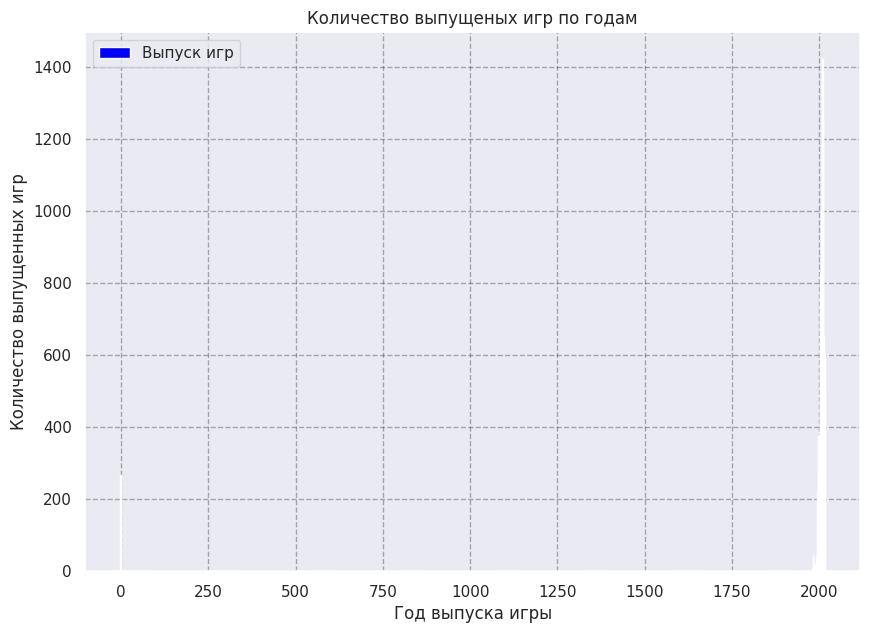

In [260]:
data_god = data[data['year_of_release'] != 0]
data_game = data_god['year_of_release'].value_counts().sort_index()
plt.bar(data_game.index, data_game.values, color='blue', alpha=1)
plt.title('Количество выпущеных игр по годам')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество выпущенных игр')
plt.grid(True, color='black', alpha=0.3, linestyle='--', linewidth=1)
plt.legend(['Выпуск игр'])
plt.show()

Для сводной таблицы к заданию «Рассчитайте количество выпущенных игр по
платформам» постройте наиболее подходящий график. Выполните его настройку
(подписи осей, легенда, заголовок графика, подписи элементов графика (столбцов и др.) и
т.д.).


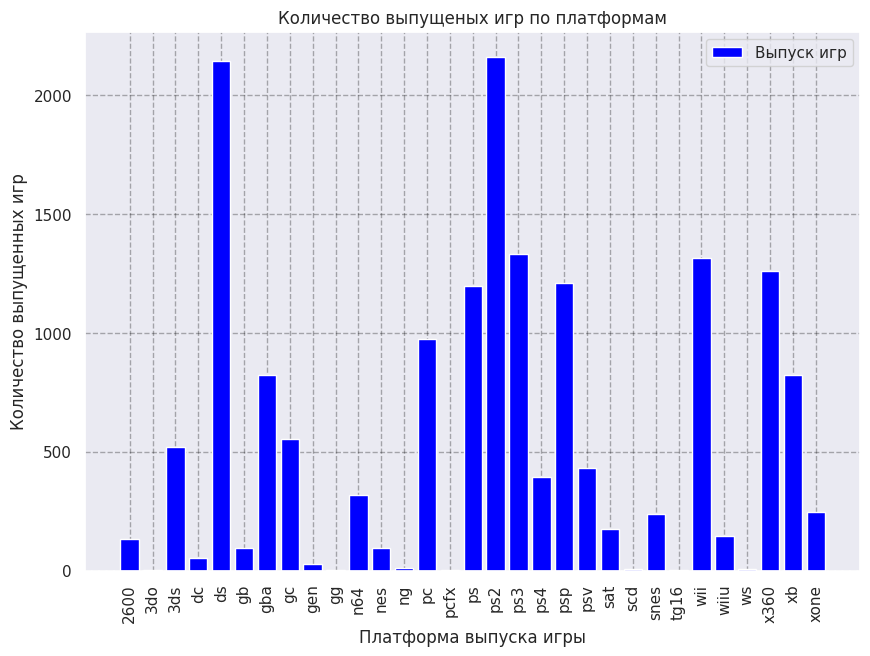

In [261]:
data_pl = data_god['platform'].value_counts().sort_index()
plt.bar(data_pl.index, data_pl.values, color='blue', alpha=1)
plt.title('Количество выпущеных игр по платформам')
plt.xlabel('Платформа выпуска игры')
plt.ylabel('Количество выпущенных игр')
plt.xticks(rotation=90)
plt.grid(True, color='black', alpha=0.3, linestyle='--', linewidth=1)
plt.legend(['Выпуск игр'])
plt.show()

Создайте не менее пяти запросов с использованием метода query(). Сделайте выводы по полученным данным.

In [262]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings_group,popular
0,pokemon ruby/pokemon sapphire,gba,2002,role-playing,6.06,3.90,5.38,0.50,-1,-1.0,nodata,15.84,0.0-30.0,-
1,brain age 2: more training in minutes a day,ds,2005,puzzle,3.43,5.35,5.32,1.18,77,7.1,e,15.28,70.1-100.0,popular
2,pokemon black/pokemon white,ds,2010,role-playing,5.51,3.17,5.65,0.80,-1,-1.0,nodata,15.13,0.0-30.0,-
3,gran turismo 3: a-spec,ps2,2001,racing,6.85,5.09,1.87,1.16,95,8.4,e,14.97,70.1-100.0,popular
4,call of duty: modern warfare 3,x360,2011,shooter,9.04,4.24,0.13,1.32,88,3.4,m,14.73,70.1-100.0,popular


In [263]:
data.query('genre == "sports" and platform == "ds" and total_sales >= 4')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings_group,popular
173,mario & sonic at the olympic games,ds,2008,sports,1.63,2.45,0.44,0.57,-1,-1.0,nodata,5.09,0.0-30.0,-


#Исследовательский анализ данных с использованием ранее изученных методов и графиков.

<Axes: >

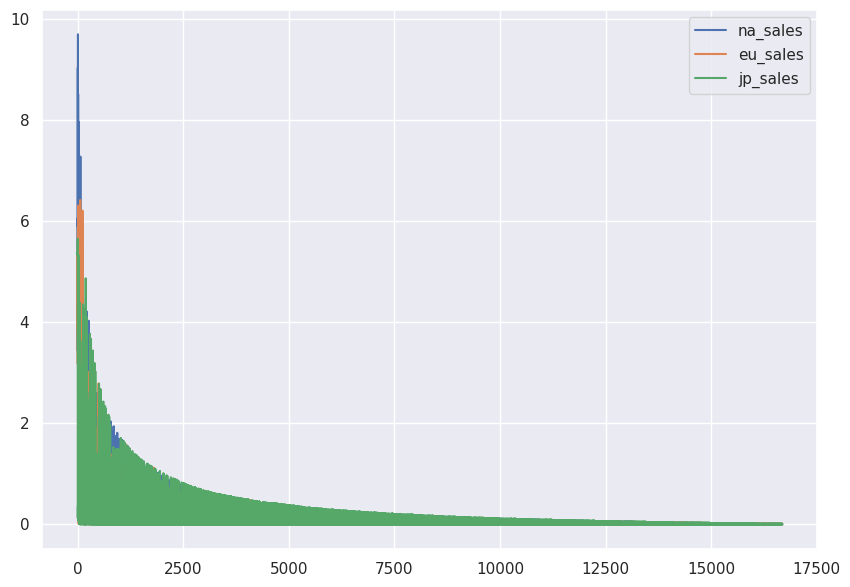

In [264]:
s = data[['na_sales','eu_sales','jp_sales']]
s.plot()

Определим самую продаваемую игру в разных странах

In [265]:
data.sort_values('na_sales', ascending=False).head(1)[['name','na_sales']]

,name,na_sales
7,call of duty: black ops,9.70


In [266]:
data.sort_values('eu_sales', ascending=False).head(1)[['name','eu_sales']]

,name,eu_sales
60,the sims 3,6.42


In [267]:
data.sort_values('jp_sales', ascending=False).head(1)[['name','jp_sales']]

,name,jp_sales
2,pokemon black/pokemon white,5.65


In [268]:
data.sort_values('other_sales', ascending=False).head(1)[['name','other_sales']]

,name,other_sales
23,gran turismo 4,7.53


In [269]:
data.sort_values('total_sales', ascending=False).head(1)[['name','total_sales']]

,name,total_sales
0,pokemon ruby/pokemon sapphire,15.84


Теперь посмотрим какой жанр игр является самым популярным во всем мире и в отдельных странах

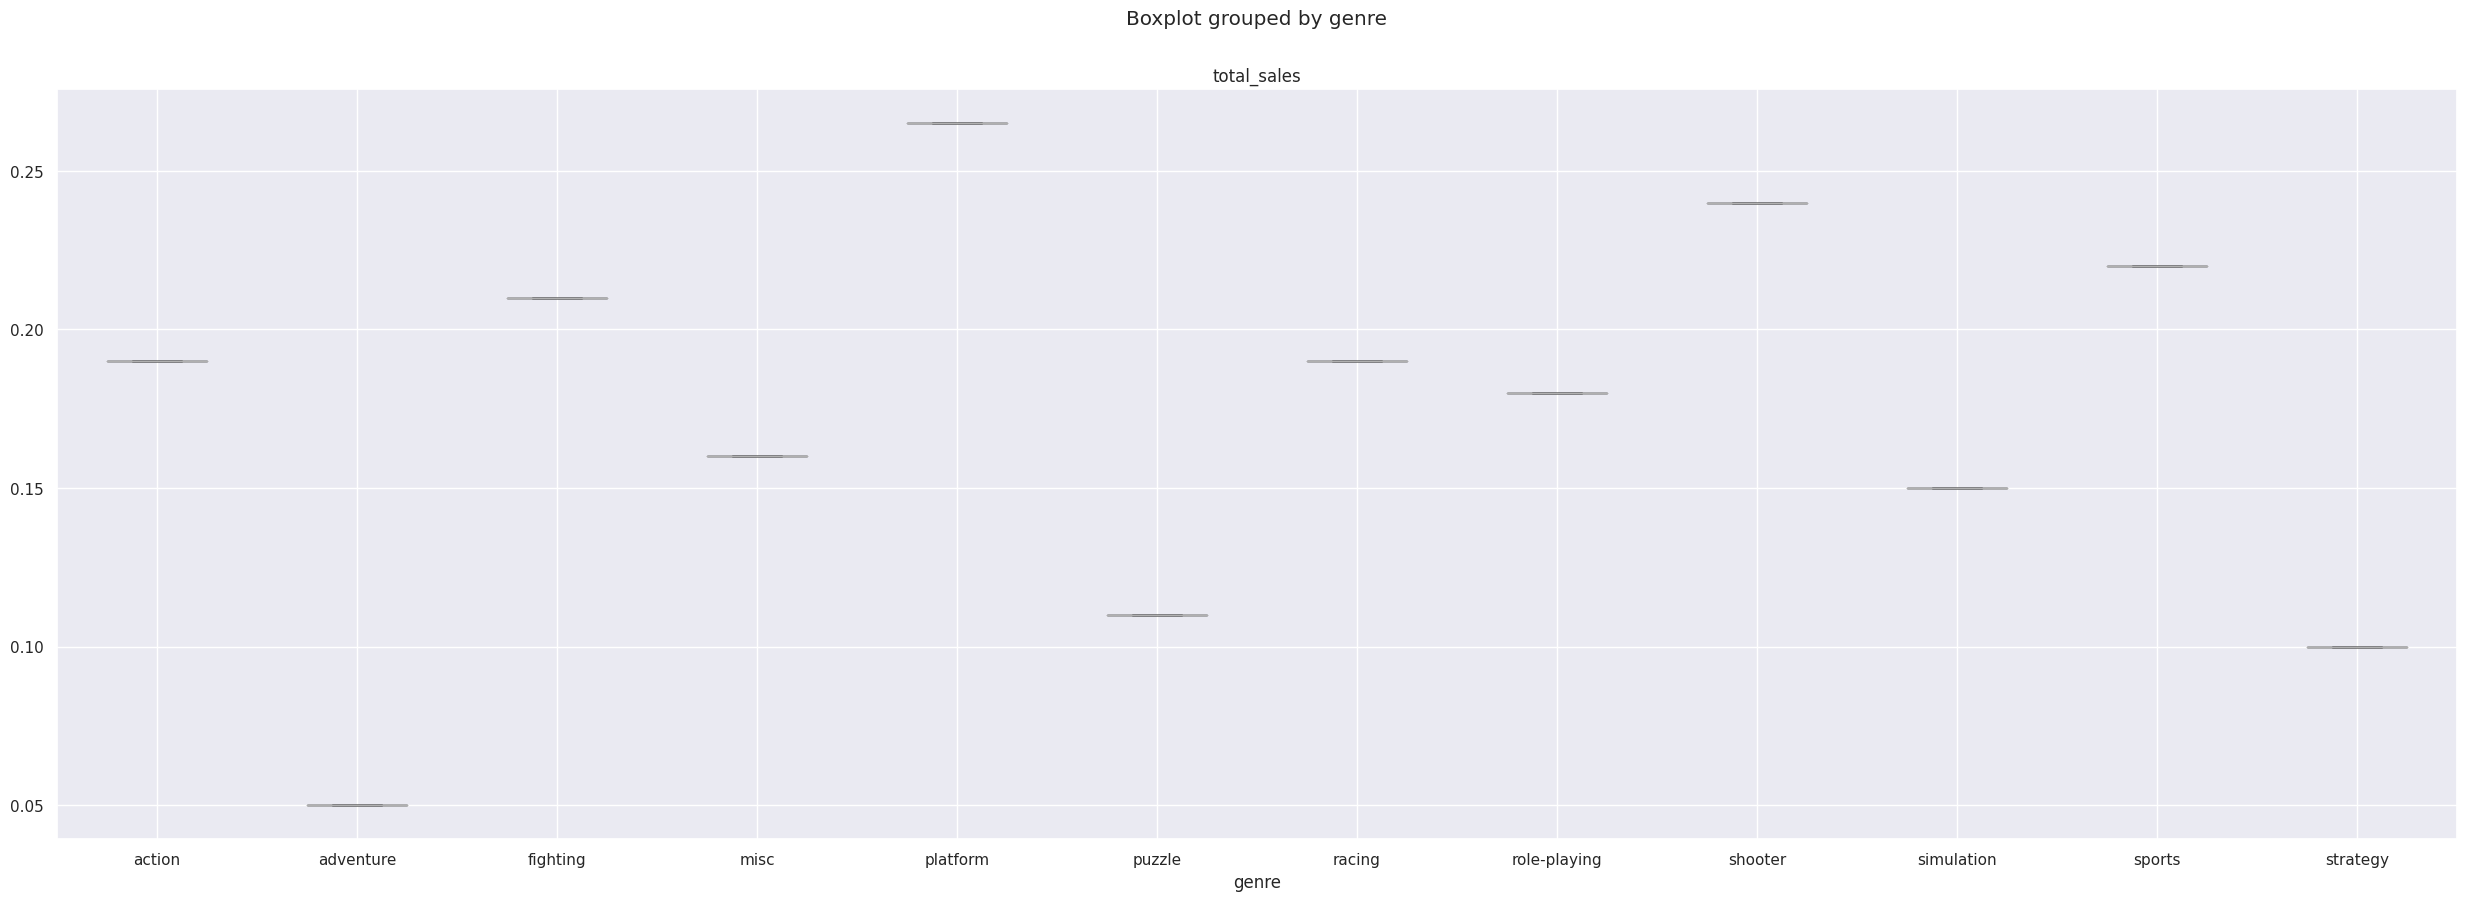

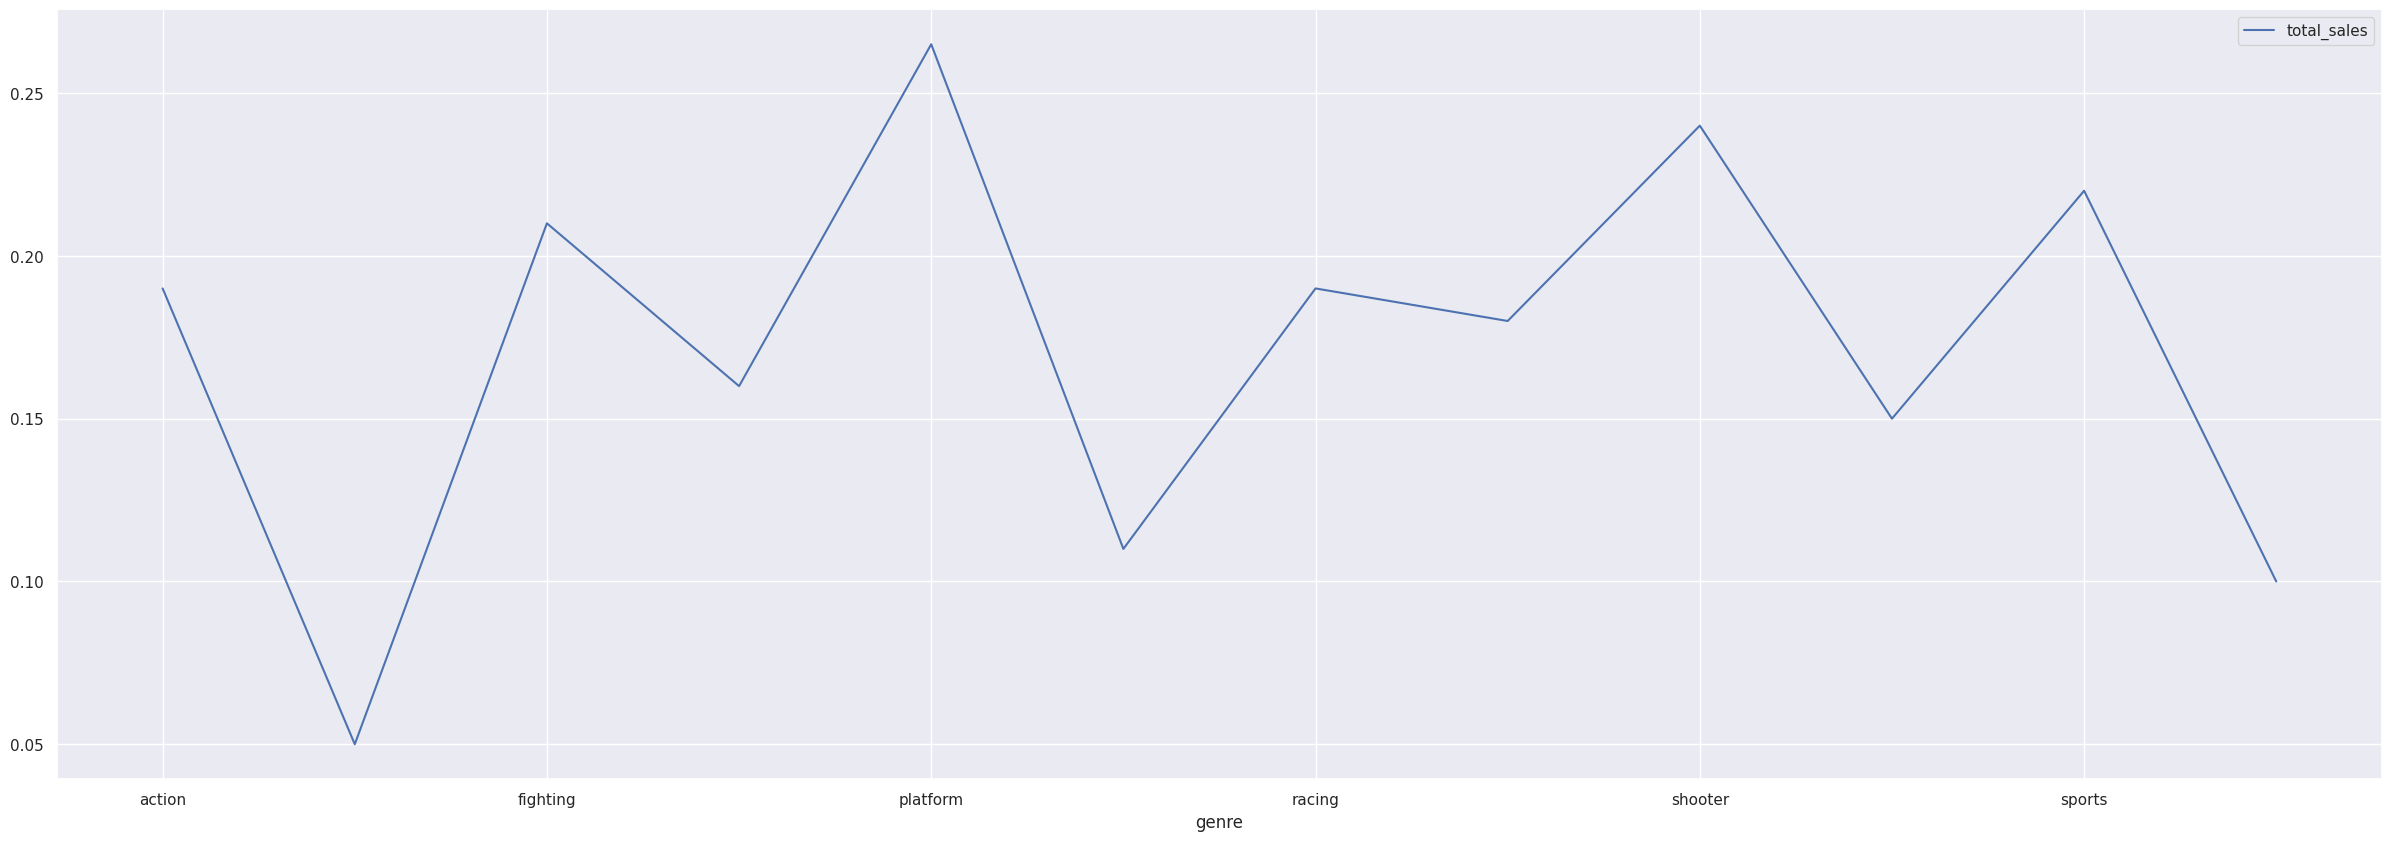

In [270]:
(
    data.pivot_table(index='genre', values='total_sales', aggfunc='median')
    .boxplot(column='total_sales', by='genre', figsize=(30,10))
)
plt.show()
(
data.pivot_table(index='genre', values='total_sales', aggfunc='median')
.plot(grid=True, figsize=(30, 10))
)
plt.show()

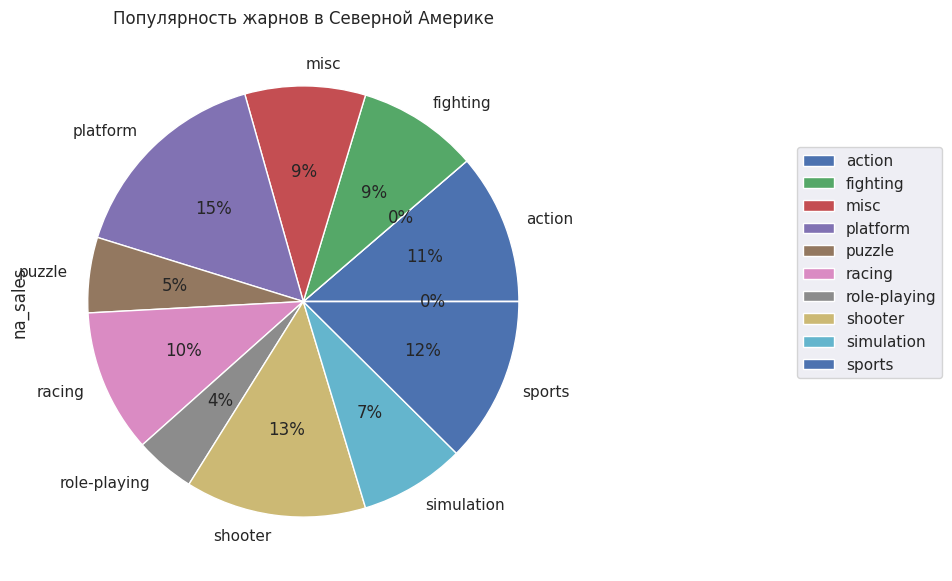

In [271]:
fig, ax = plt.subplots()
(
data.pivot_table(index='genre', values='na_sales', aggfunc='median')
.plot(kind='pie',subplots=True, ax=ax, grid=True, figsize=(30, 10),autopct='%i%%')
)
plt.title('Популярность жарнов в Северной Америке')

ax.legend(loc='best', bbox_to_anchor=(1.7, 0.8))

plt.show()

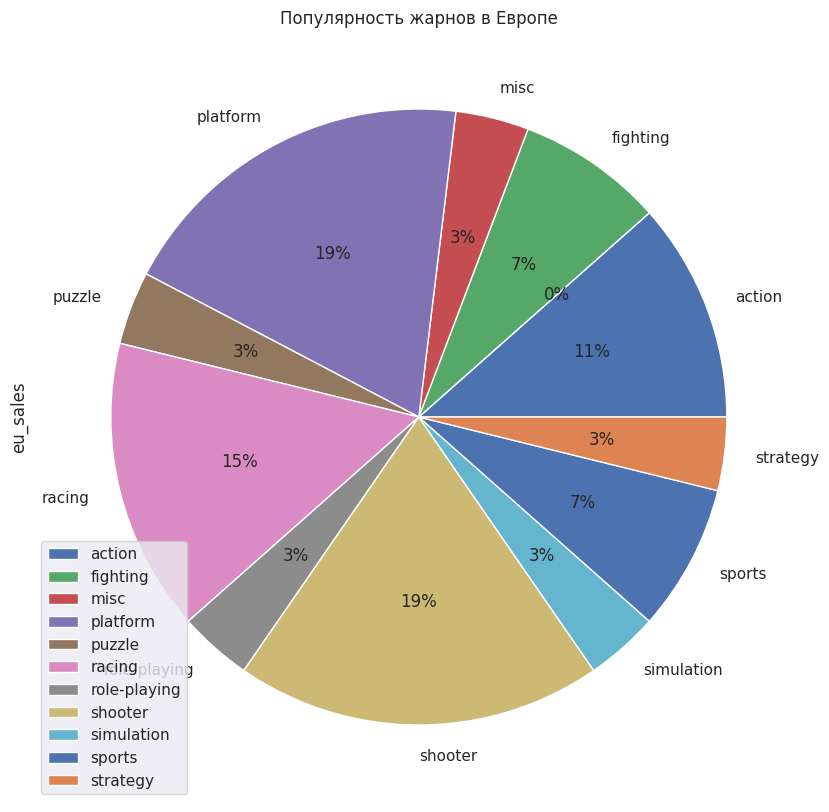

In [272]:
(
data.pivot_table(index='genre', values='eu_sales', aggfunc='median')
.plot(kind='pie',subplots=True, grid=True, figsize=(30, 10),autopct='%i%%')
)
plt.title('Популярность жарнов в Европе')

ax.legend(loc='best', bbox_to_anchor=(1.7, 0.8))
plt.show()

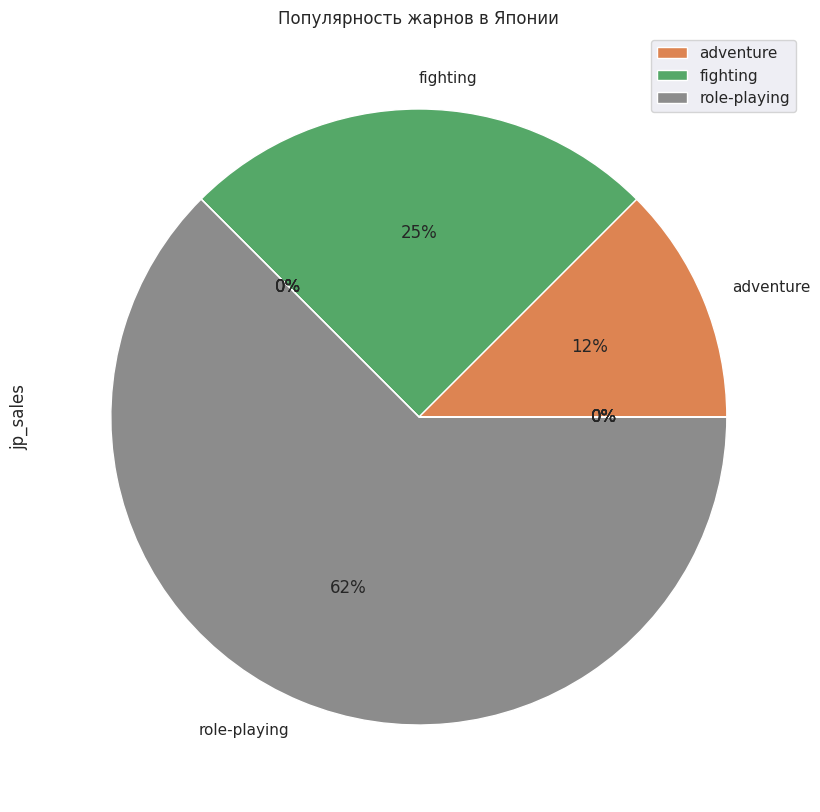

In [273]:
(
data.pivot_table(index='genre', values='jp_sales', aggfunc='median')
.plot(kind='pie',subplots=True, grid=True, figsize=(30, 10),autopct='%i%%')
)
plt.title('Популярность жарнов в Японии')

ax.legend(loc='best', bbox_to_anchor=(1.7, 0.8))
plt.show()

Выведем средние, минимальные, максимальные оценки критиков и пользователей, а также сумму баллов по жанрам

In [274]:
data_pivot_ratings = data.pivot_table(
    index='genre', values=['critic_score', 'user_score'], aggfunc=['mean', 'min', 'max', 'sum'],
    margins=True, margins_name='total'
)

data_pivot_ratings

<ipython-input-274-855400504238>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  data_pivot_ratings = data.pivot_table(
<ipython-input-274-855400504238>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  data_pivot_ratings = data.pivot_table(


mean          min                     max             \
             critic_score critic_score user_score critic_score user_score   
genre                                                                       
action              36.88           -1       -1.0           98        9.5   
adventure           15.44           -1       -1.0           93        9.4   
fighting            32.83           -1       -1.0           98        9.2   
misc                19.07           -1       -1.0           93        9.2   
platform            37.72           -1       -1.0           97        9.4   
puzzle              25.47           -1       -1.0           90        9.5   
racing              39.86           -1       -1.0           96        9.5   
role-playing        35.31           -1       -1.0           96        9.7   
shooter             49.80           -1       -1.0           97        9.3   
simulation          27.10           -1       -1.0           92        9.6   
sports              36.03           -1       -1.0           98        9.5   
strategy            31.32           -1       -1.0           94        9.4   
total               33.03           -1       -1.0           98        9.7   

                      sum  
             critic_score  
genre                      
action             124067  
adventure           20122  
fighting            27870  
misc                33342  
platform            33194  
puzzle              14748  
racing              49669  
role-playing        52787  
shooter             65730  
simulation          23634  
sports              84373  
strategy            21389  
total              550925

Посмотрим какую игру лучше всего оценили критики и пользователи

In [275]:
data.sort_values('critic_score', ascending=False).head(1)[['name','critic_score']]

,name,critic_score
202,tony hawk's pro skater 2,98


In [276]:
data.sort_values('user_score', ascending=False).head(1)[['name','user_score']]

,name,user_score
14378,breath of fire iii,9.7


Составьте «портрет» типичного пользователя платформы 'x360'

In [277]:
new_data = data.query('platform == "x360"')
new_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings_group,popular
4,call of duty: modern warfare 3,x360,2011,shooter,9.04,4.24,0.13,1.32,88,3.4,m,14.73,70.1-100.0,popular
7,call of duty: black ops,x360,2010,shooter,9.70,3.68,0.11,1.13,87,6.3,m,14.62,70.1-100.0,popular
10,call of duty: black ops ii,x360,2012,shooter,8.25,4.24,0.07,1.12,83,4.8,m,13.68,70.1-100.0,popular
11,call of duty: modern warfare 2,x360,2009,shooter,8.52,3.59,0.08,1.28,94,6.3,m,13.47,70.1-100.0,popular
19,halo 3,x360,2007,shooter,7.97,2.81,0.13,1.21,94,7.8,m,12.12,70.1-100.0,popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16579,dragon ball z for kinect,x360,2012,fighting,0.01,0.00,0.00,0.00,49,2.1,t,0.01,30.1-50.0,-
16588,world snooker championship 2007,x360,2007,sports,0.00,0.01,0.00,0.00,-1,-1.0,nodata,0.01,0.0-30.0,-
16613,metal gear solid hd edition,x360,2011,action,0.00,0.00,0.01,0.00,-1,-1.0,m,0.01,0.0-30.0,-
16620,ben 10 omniverse 2,x360,2013,action,0.00,0.01,0.00,0.00,-1,5.1,e10+,0.01,0.0-30.0,-


Выявим самую популярную игру на данной платформе

In [278]:
new_data.sort_values('total_sales', ascending=False).head(1)[['name','total_sales']]

,name,total_sales
4,call of duty: modern warfare 3,14.73


Рассмотрим график популярности жанров на данной платформе

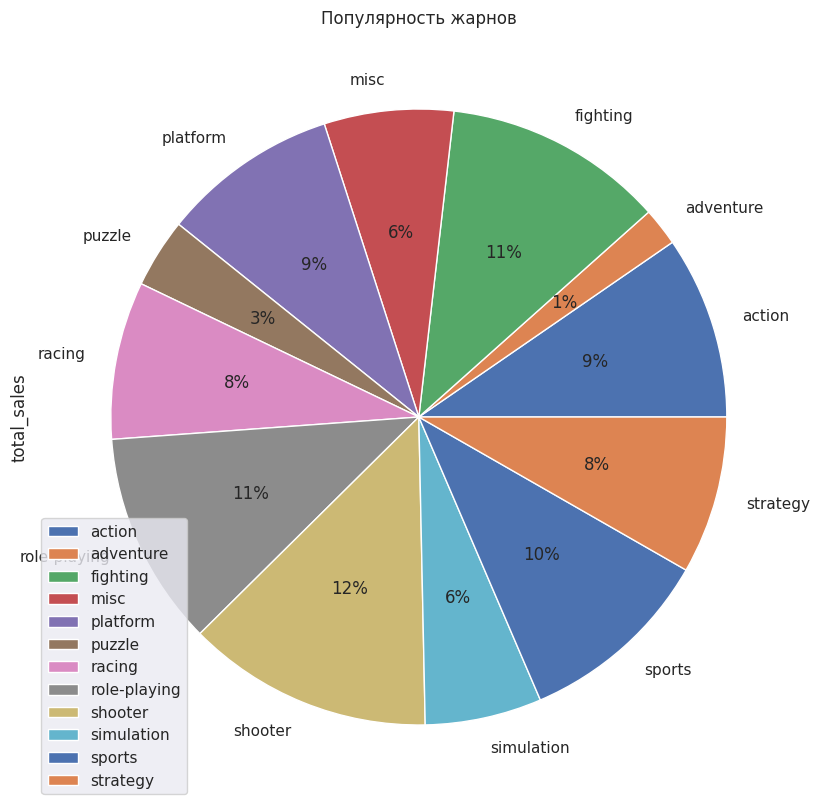

In [279]:
(
new_data.pivot_table(index='genre', values='total_sales', aggfunc='median')
.plot(kind='pie',subplots=True, grid=True, figsize=(30, 10),autopct='%i%%')
)
plt.title('Популярность жарнов')

ax.legend(loc='best', bbox_to_anchor=(1.7, 0.8))
plt.show()

Посмотрим общую сумму продаж игр разных жанров за каждый год

In [280]:
data_pivot = new_data.pivot_table(
    index='genre', columns='year_of_release', values='total_sales', aggfunc='mean',
    margins=True,
    margins_name='total')

data_pivot

year_of_release,-1,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
genre,,,,,,,,,,,,,,
action,0.49,0.25,0.46,0.39,1.24,0.69,0.83,0.62,0.85,0.73,0.47,0.22,0.16,0.69
adventure,NaN,NaN,NaN,2.83,0.26,0.11,0.06,0.35,0.34,0.02,0.10,0.31,0.03,0.31
fighting,NaN,0.46,0.45,0.85,0.81,1.02,0.50,0.51,0.27,0.95,0.11,0.23,NaN,0.57
misc,0.65,NaN,0.09,1.13,0.62,0.45,0.48,0.37,0.47,2.80,0.35,0.27,0.04,0.55
platform,NaN,NaN,0.57,0.57,0.55,0.16,0.14,0.77,NaN,0.49,NaN,0.09,0.10,0.45
puzzle,0.14,NaN,0.04,0.16,NaN,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.12
racing,0.28,0.68,0.48,0.84,0.90,0.80,0.58,0.57,0.59,0.36,0.23,0.01,NaN,0.63
role-playing,NaN,NaN,0.86,0.69,1.41,0.56,1.27,1.28,0.90,0.84,0.46,NaN,NaN,0.95
shooter,0.22,1.06,0.98,1.70,1.31,1.22,1.48,1.47,2.48,1.15,1.03,0.78,0.04,1.36


Выясним в какой стране игры с данной платформы собрали больше всего денег с продаж

In [281]:
data_pivot_s = new_data.pivot_table(
    index='platform', values=['na_sales', 'eu_sales','jp_sales','other_sales','total_sales'], aggfunc=['sum']
)
data_pivot_s

sum                                          
         eu_sales jp_sales na_sales other_sales total_sales
platform                                                   
x360       260.72    12.13   577.70       82.65      933.20

<Axes: xlabel='platform'>

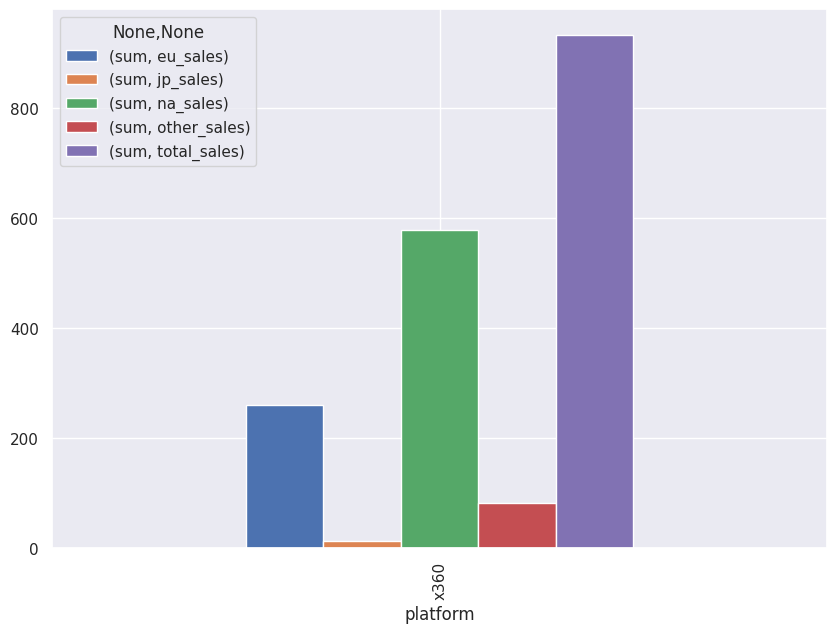

In [282]:
data_pivot_s.plot(kind = 'bar')

Посмотрим топ 5 игр с лучшими оценками от критиков и от пользователей

In [283]:
new_data.sort_values('critic_score', ascending=False).head(5)[['name','critic_score']]

,name,critic_score
26,grand theft auto iv,98
425,mass effect 2,96
939,the orange box,96
50,the elder scrolls v: skyrim,96
491,bioshock,96


In [284]:
new_data.sort_values('user_score', ascending=False).head(5)[['name','user_score']]

,name,user_score
110,red dead redemption,9.0
10285,cabela's north american adventures,9.0
939,the orange box,8.9
491,bioshock,8.9
425,mass effect 2,8.9


Проанализируйте статистические показатели (описательные статистики) для
числовых переменных датафрейма. Сделайте выводы

In [285]:
data.select_dtypes(exclude=['object', 'bool']).describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,"16,681.00","1,974.24",252.48,-1.00,"2,003.00","2,007.00","2,010.00","2,016.00"
na_sales,"16,681.00",0.24,0.54,0.00,0.00,0.08,0.24,9.70
eu_sales,"16,681.00",0.13,0.36,0.00,0.00,0.02,0.11,6.42
jp_sales,"16,681.00",0.07,0.26,0.00,0.00,0.00,0.04,5.65
other_sales,"16,681.00",0.04,0.14,0.00,0.00,0.01,0.03,7.53
critic_score,"16,681.00",33.03,36.28,-1.00,-1.00,-1.00,70.00,98.00
total_sales,"16,681.00",0.49,1.05,0.00,0.06,0.17,0.47,15.84


In [286]:
data.shape[0]

16681

In [287]:
crit = data['critic_score'] / 10
crit

0       -0.10
1        7.70
2       -0.10
3        9.50
4        8.80
         ... 
16676   -0.10
16677   -0.10
16678   -0.10
16679   -0.10
16680   -0.10
Name: critic_score, Length: 16681, dtype: float64

Постройте гистограммы частот и «ящики с усами» для числовых переменных датафрейма. Проанализируйте и сделайте выводы по выбросам для каждого признака (для каждого столбца).

In [288]:
stat = data.select_dtypes(exclude=['object', 'bool'])

In [289]:
def plots(data, data_label, n_bins):

    a, axes = plt.subplots(1, 2, figsize=(16,4))

    axes[0].set_title('частота распределения', fontsize=14)
    axes[0].set_ylabel('частота', fontsize=14)
    axes[0].set_xlabel(data_label, fontsize=14)

    data.hist(bins=n_bins, ax=axes[0], edgecolor='black', linewidth=1)

    axes[1].set_title('boxplot', fontsize=14)
    axes[1].set_xlabel(data_label, fontsize=14)

    sns.boxplot(data=stat, x=data_label, ax=axes[1], linewidth=1)

    plt.show()

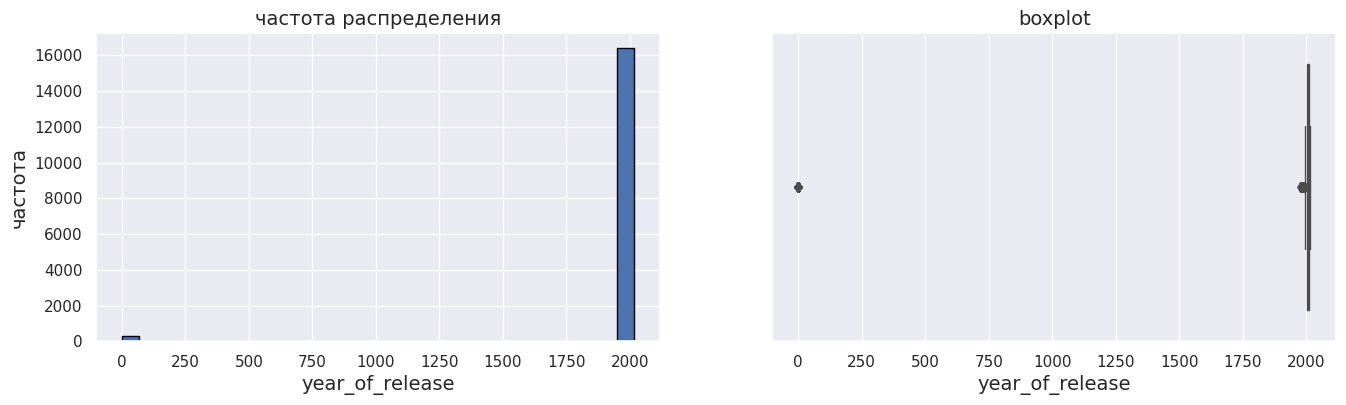

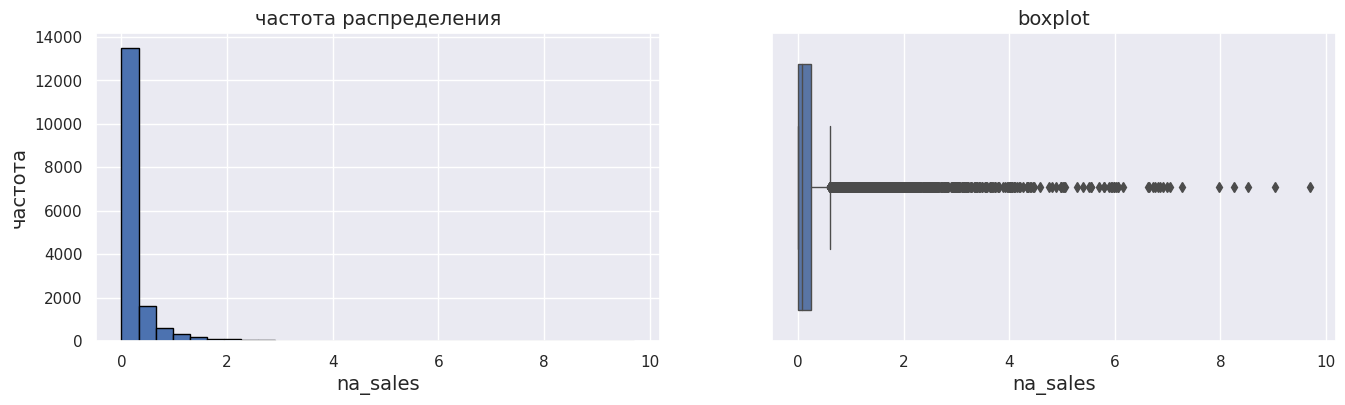

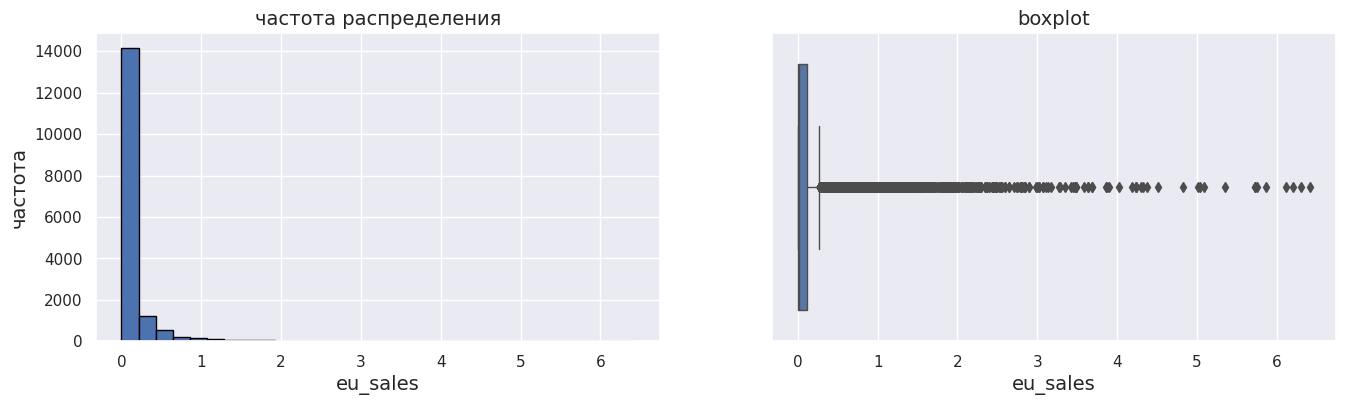

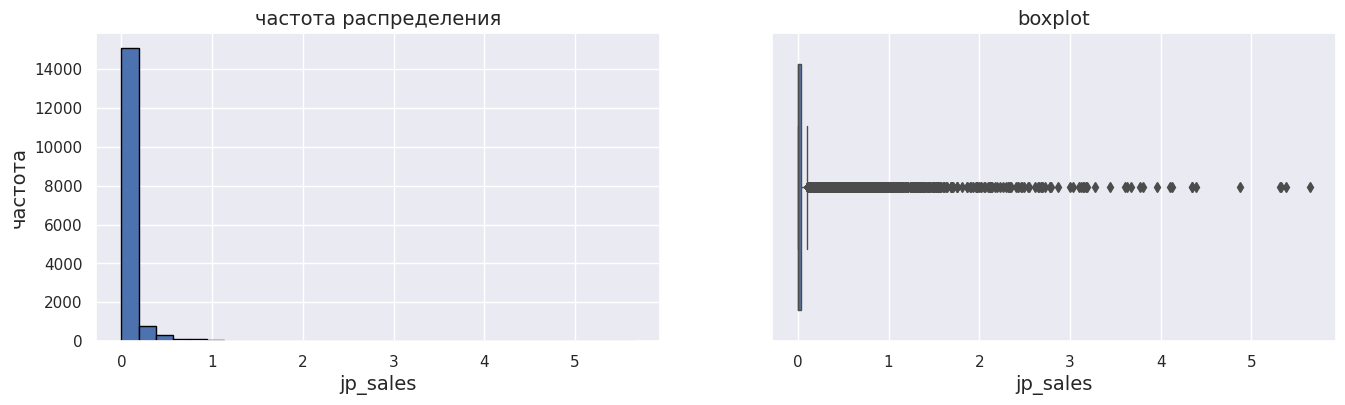

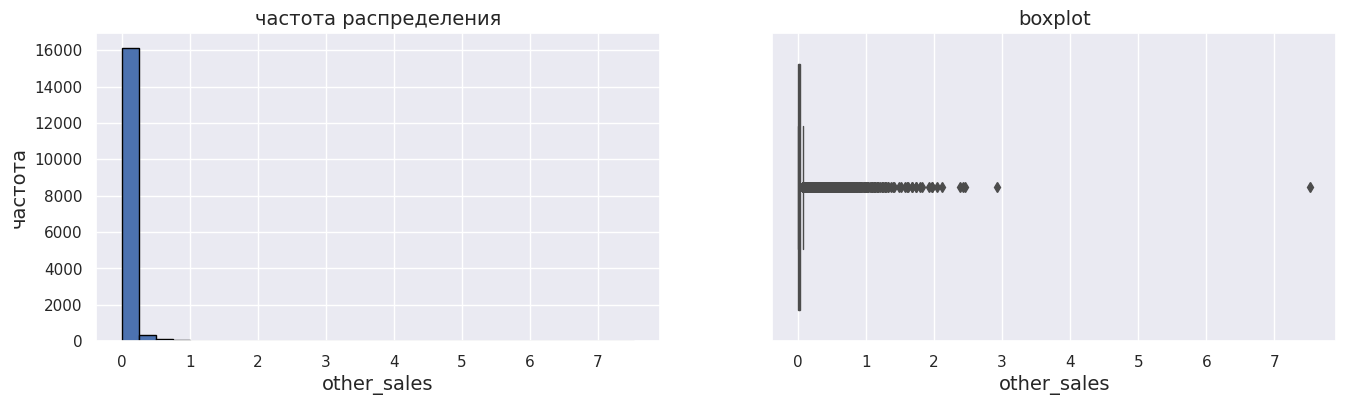

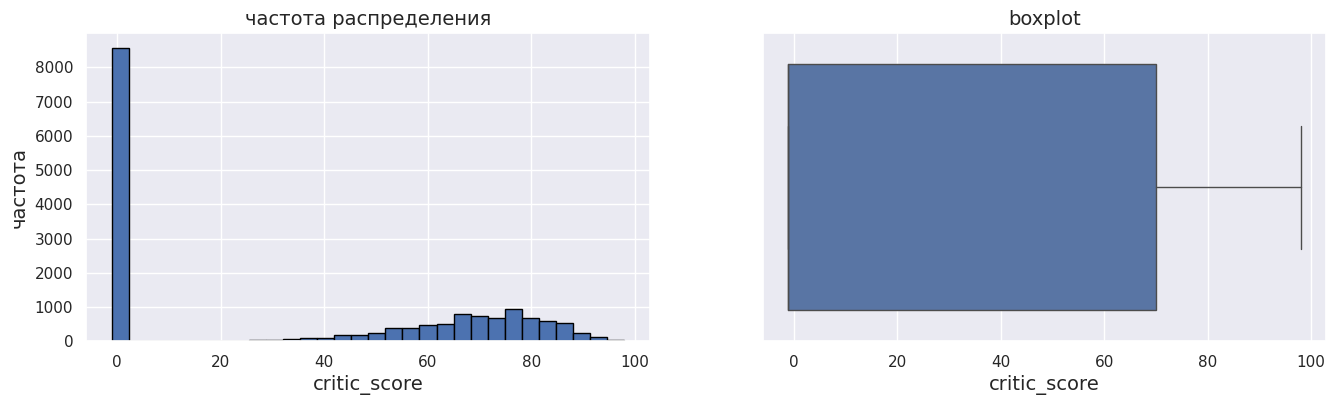

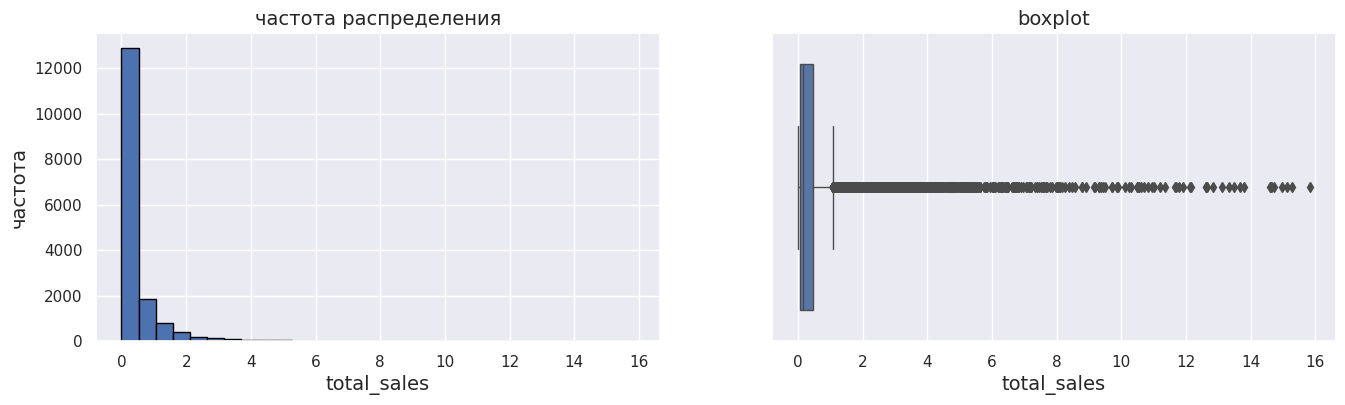

In [290]:
for column in stat.columns:

    plots(stat[column], column, n_bins=30)

Установите, есть ли линейная связь между числовыми признаками. Если есть, то
между какими признаками и насколько она сильная.

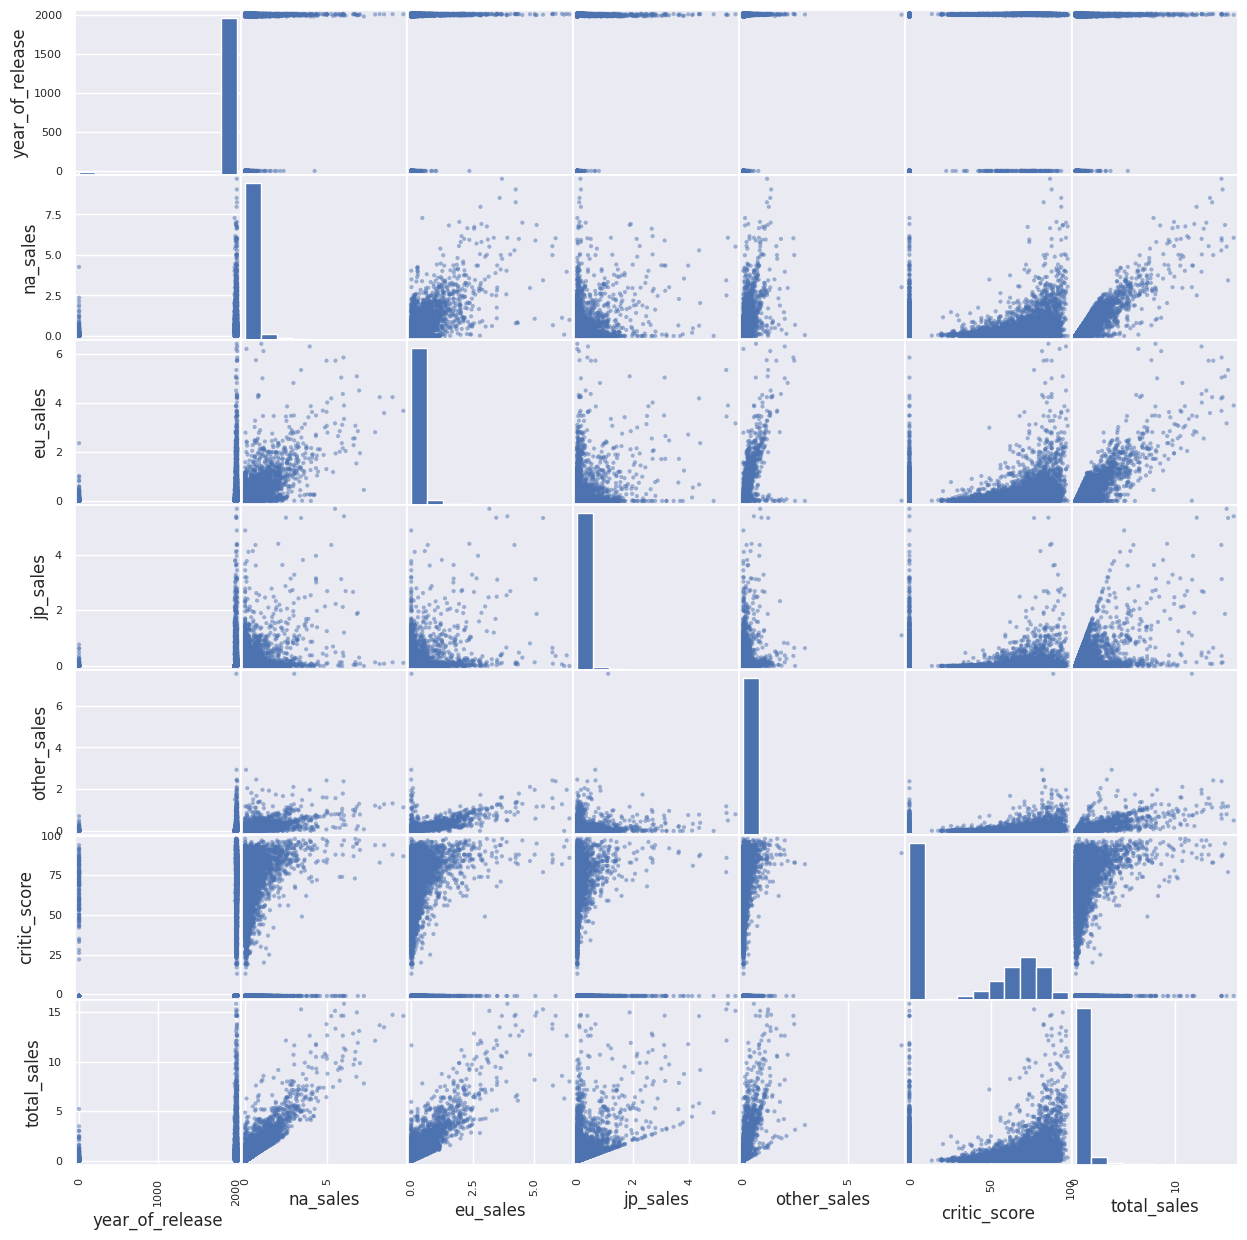

In [291]:
pd.plotting.scatter_matrix(stat, figsize=(15, 15))

plt.show()

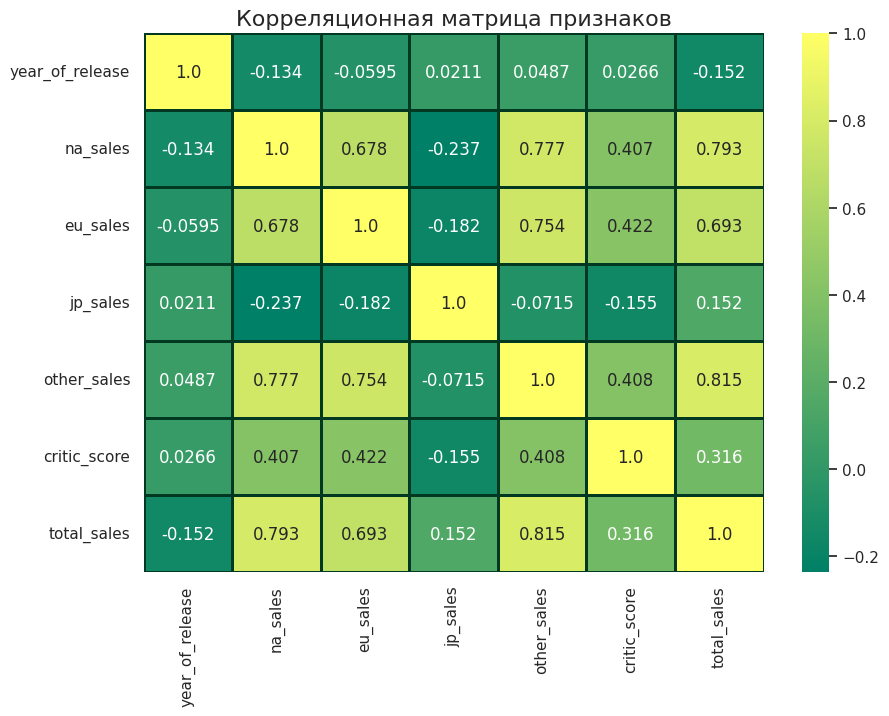

In [292]:
sns.set(rc = {'figure.figsize':(10,7)})

sns.heatmap(stat.corr(method='spearman'), annot = True, fmt='.3', cmap= 'summer', linewidths=1, linecolor='#003822')

plt.title('Корреляционная матрица признаков', fontsize=16)

plt.show()

**Вывод**

1. В столбцах na_sales и eu_sales присутствует слабая линейная зависимость.
2. В столбцах na_sales и total_sales присутствует сильная линейная зависимость.
3. В столбцах eu_sales и total_sales присутствует сильная линейная зависимость.
4. В столбцах jp_sales и eu_sales присутствует слабая линейная зависимость.
5. В столбцах jp_sales и total_sales присутствует слабая линейная зависимость.
6. В столбцах other_sales и eu_sales присутствует слабая линейная зависимость.
7. В столбцах other_sales и total_sales присутствует слабая линейная зависимость.



***

# 5. Построение и обучение простейшей модели для задачи регрессии
<a id='общий_вывод_задание'></a>
[К содержанию](#предобработка_данных)

Объявление глобальных переменных

In [293]:
RANDOM_STATE=12345

Отбор и выделение признаков

In [294]:
feature = data[['year_of_release', 'na_sales', 'jp_sales', 'other_sales', 'user_score', 'critic_score']]

Целевую переменную поместим в переменную target

In [295]:
target = data['eu_sales']

In [296]:
print(type(feature), type(target))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


Разобьем данные на обучающую(70%) и тестовую выборку(30%)

In [297]:
features_train, features_test, target_train, target_test = train_test_split(
  feature, target,
  test_size=0.3,
  random_state=RANDOM_STATE
)

Посмотрим на новую размерность обучающей выборки

In [298]:
print(f'Признаки обучающей выборки: {features_train.shape}')
print(f'Целевой признак обучающей выборки: {target_train.shape}')

Признаки обучающей выборки: (11676, 6)
Целевой признак обучающей выборки: (11676,)


Посмотрим на новую размерность тестовой выборки

In [299]:
print(f'Признаки тестовой выборки: {features_test.shape}')
print(f'Целевой признак тестовой выборки: {target_test.shape}')

Признаки тестовой выборки: (5005, 6)
Целевой признак тестовой выборки: (5005,)


Создадим объект этого класса и запишем в переменную model

In [300]:
%%time

model = LinearRegression()

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 12.9 µs


Обучим модель линейной регрессии

In [301]:
%%time

model.fit(features_train, target_train)

CPU times: user 15.6 ms, sys: 907 µs, total: 16.5 ms
Wall time: 17.7 ms


LinearRegression()

На основе нескольких независимых переменных (feature) предскажем пользовательскую оценку (target)

In [302]:
target_pred = model.predict(features_test)

Выведем первые пять значений с помощью диапазона индексов

In [303]:
print(target_pred[:5])

[ 0.12163772  0.13054274  0.1415299  -0.00020734  0.0157373 ]


In [304]:
target_test

4899    0.17
2889    0.49
4409    0.09
13415   0.00
12215   0.06
        ... 
6832    0.02
14087   0.01
11059   0.01
9814    0.05
3404    0.23
Name: eu_sales, Length: 5005, dtype: float64

Модель имеет небольшие погрешности в предсказании данных

In [305]:
coefficients = pd.DataFrame({'feature': feature.columns, 'coefficients' : model.coef_})
print(coefficients)

           feature  coefficients
0  year_of_release          0.00
1         na_sales          0.33
2         jp_sales          0.10
3      other_sales          0.84
4       user_score         -0.00
5     critic_score          0.00


# Оценка модели

Выведем корень среднеквадратической ошибки
и сравним тестовые и прогнозные значения оценок пользователей

In [306]:
print('Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(target_test, target_pred)))

Root Mean Squared Error (RMSE):  0.25245456093584456


Рассчитаем коэффициент детерминации R2

In [307]:
print('R2:', np.round(metrics.r2_score(target_test, target_pred), 2))

R2: 0.58


Коэффицент детерминации R2 равен 0.58, что является средней точностью предсказания данных

#Предсказание для одной игры

In [308]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ratings_group,popular
0,pokemon ruby/pokemon sapphire,gba,2002,role-playing,6.06,3.90,5.38,0.50,-1,-1.0,nodata,15.84,0.0-30.0,-


In [309]:
new_game = pd.DataFrame({'year_of_release': [2002], 'na_sales': [6.06], 'jp_sales': [5.38], 'other_sales': [0.50], 'user_score': [9],'critic_score': [90]})
prediction = model.predict(new_game)

print(f"{prediction[0]}")

2.9988187567027227


 **Вывод**

-  Предсказание получилось очень близкое к правде, значит модель работает так, как нужно. Ошибок не выявлено. Правильность предсказания: средняя

# 6. Общий вывод по проекту
<a id='общий_вывод_задание'></a>
[К содержанию](#предобработка_данных)

В рамках учебного проекта «Интернет-магазин компьютерных игр» был проанализирован датасет, содержащий информацию о компьютерных играх<br>

В ходе **предварительного изучения и предобработки данных**:
- В датафрейме 16681 записей, 11 столбцов.
- Все данные были приведены к нижнему регистру
- Все заголовки были приведены к "змеиному регистру"
- 5 столбцов не содержат пропущенных значений.
- Заменены пропущенные значения и ошибочные значения.
- Изменён тип данных там, где это необходимо.
- Дубликатов в таблице не выявлено.
- Пустых значений в записи не выявлено.
- Были добавлены несколько эксперементальных столбцов, которые помогают более детально оценить предоставленные данные.

Был проведен **исследовательский анализ** и получены следующие выводы:
- Поиск по координатам проводится успешно.
- На ds и ps2 было выпущено наибольшее количество игр. По 12%.
- Протестировали поиск по разным фильтрам разными методами, всё работает.

Был проведен **графический анализ данных** и получены следующие выводы:
- В столбцах na_sales и eu_sales присутствует слабая линейная зависимость.
- В столбцах na_sales и total_sales присутствует сильная линейная зависимость.
- В столбцах eu_sales и total_sales присутствует сильная линейная зависимость.
- В столбцах jp_sales и eu_sales присутствует слабая линейная зависимость.
- В столбцах jp_sales и total_sales присутствует слабая линейная зависимость.
- В столбцах other_sales и eu_sales присутствует слабая линейная зависимость.
- В столбцах other_sales и total_sales присутствует слабая линейная зависимость.


Было проведено **построение и обучение простейшей модели для задачи регрессиии** получены следующие выводы:
- Root Mean Squared Error (RMSE) равен 0.25245456093584456
- Коэффицент детерминации R2 равен 0.58, что является средней точностью предсказания данных
- Модель сделала предсказание средней точности на конкретной игре, получив значение 2.99 при действительном 3.90

**Мы имеем проект, в котором были проведены все необходимые исследования и изменения для правильного построения и обучения простейшей модели для задачи регрессии.**